MuscleHub Gym A/B Test

In [1]:
import pandas as pd
import csv
from matplotlib import pyplot as plt

Open visits file

In [2]:
visits = pd.read_csv("visits.csv")
visits.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


Open fitness_tests file

In [3]:
fitness_tests = pd.read_csv("fitness_tests.csv")
fitness_tests.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


Open applications file

In [4]:
applications = pd.read_csv("applications.csv")
applications.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


Open purchase file

In [5]:
purchases = pd.read_csv("purchases.csv")
purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


Databases information:

- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an 
application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

DataFrame containing all of the files

In [6]:
all_df = visits.merge(fitness_tests, how="outer").merge(applications, how="outer").merge(purchases, how="outer")
all_df.head()


,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17,NaN,NaN,NaN
1,Annette,Boone,AB9982@gmail.com,female,5-1-17,NaN,NaN,NaN
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17,NaN,NaN,NaN
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17,NaN,NaN,NaN
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17,NaN,NaN,NaN


The study will be performed with information where data from `visit_date` is on or after `7-1-17`.

In [7]:
df = all_df[all_df.visit_date >= "7-1-17"]
df

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
88,Roger,Underwood,Roger.Underwood@gmail.com,male,9-27-17,2017-09-30,NaN,NaN
1001,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1002,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
1003,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
1004,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
...,...,...,...,...,...,...,...,...
5999,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17,NaN,NaN,NaN
6000,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17,2017-09-15,NaN,NaN
6001,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17,2017-09-15,NaN,NaN
6002,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17,NaN,2017-09-13,NaN


Add a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if 
`fitness_test_date` is `None`.

In [8]:
df["ab_test_group"] = df.fitness_test_date.apply(lambda x: "A" if pd.notnull(x) else "B")
df

C:\Users\camil\AppData\Local\Temp\ipykernel_11360\1530916805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ab_test_group"] = df.fitness_test_date.apply(lambda x: "A" if pd.notnull(x) else "B")


,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
88,Roger,Underwood,Roger.Underwood@gmail.com,male,9-27-17,2017-09-30,NaN,NaN,A
1001,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A
1002,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A
1003,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B
1004,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
...,...,...,...,...,...,...,...,...,...
5999,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17,NaN,NaN,NaN,B
6000,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A
6001,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A
6002,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17,NaN,2017-09-13,NaN,B


Use `groupby` to count how many users are in each `ab_test_group`.

In [9]:
ab_counts = df.groupby("ab_test_group").first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


Pie cart to check if half of the visitors are in A and half are in B

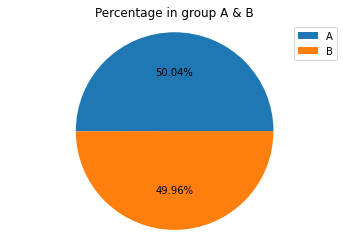

In [10]:
plt.pie(ab_counts.first_name.values, autopct='%0.2f%%')
plt.legend(ab_counts.ab_test_group)
plt.axis('equal')
plt.title("Percentage in group A & B")
plt.savefig('ab_test_pie_chart.png')
plt.show()

Recall that the sign-up process for MuscleHub Gym has several steps:
1. Take a fitness test with a personal trainer (only Group A).
2. Fill out an application for the gym.
3. Send in their payment for their first month's membership.

How many people make it to Step 2, filling out an application?

* Create a new column called `is_application` which is `Application` if `application_date` is not 
    `None` and `No Application`, otherwise.

In [11]:
df["is_application"] = df.application_date.apply(lambda x: "Application" if pd.notnull(x) else "No Application")

C:\Users\camil\AppData\Local\Temp\ipykernel_11360\3437191151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_application"] = df.application_date.apply(lambda x: "Application" if pd.notnull(x) else "No Application")



* Create a new DataFrame using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.

* Pivot the DataFrame to calculate the percent of people in each group complete an application.

* Define a new column called `Total`, which is the sum of `Application` and `No Application`.

* Calculate another column called `Percent with Application`

In [12]:

app_counts = df.groupby(["ab_test_group", "is_application"])["first_name"].count().reset_index()

app_pivot = app_counts.pivot(columns="is_application", index="ab_test_group", values="first_name").reset_index()

app_pivot["Total"] = app_pivot["Application"] + app_pivot["No Application"]

app_pivot["Percent with Application"] = app_pivot["Application"] / app_pivot["Total"]

app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


Of those who picked up an application, how many purchased a membership?

* Create a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [13]:
df["is_member"] = df.purchase_date.apply(lambda x: "Member" if pd.notnull(x) else "Not Member")

C:\Users\camil\AppData\Local\Temp\ipykernel_11360\1149888934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_member"] = df.purchase_date.apply(lambda x: "Member" if pd.notnull(x) else "Not Member")


Create a DataFrame that contains only people who picked up an application.

In [14]:
just_apps = df[df.is_application == "Application"]

* Create a new DataFrame using `groupby` to find out how many people in `just_apps` are and aren't members from each group.
* Pivot the DataFrame to calculate the percent of people in each group who purchased a membership.
* Define a new column called `Total`, which is the sum of `Application` and `No Application`.
* Calculate another column called `Percent Purchase`

    

In [15]:
member_count = just_apps.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

member_pivot = member_count.pivot(columns='is_member', index='ab_test_group', values='first_name').reset_index()

member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']

member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total

member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


What percentage of **all visitors** purchased memberships?

* Create a new DataFrame using `groupby` to find out how many people in `df` are and aren't members from each group.

In [16]:
final_member_count = df.groupby(["ab_test_group", "is_member"]).first_name.count().reset_index()

* Pivot the DataFrame to calculate the percent of all visitors of each group who purchased a membership.
* Define a new column called `Total`, which is the sum of `Not Member` and `Member`.
* Calculate another column called `Percent Purchase`.


In [17]:
final_member_pivot = final_member_count.pivot(columns='is_member',index='ab_test_group', values='first_name').reset_index()

final_member_pivot["Total"] = final_member_pivot["Not Member"] + final_member_pivot["Member"]

final_member_pivot["Percent Purchase"] = final_member_pivot["Member"] / final_member_pivot["Total"]

final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


Bar chart to show the difference between Group A (people who were given the fitness 
test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

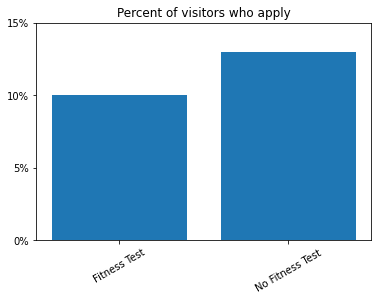

In [18]:
ax = plt.subplot()
plt.bar(([0, 1]), app_pivot["Percent with Application"])
plt.title("Percent of visitors who apply")
ax.set_yticks([0, 0.05, 0.10, 0.15])
ax.set_yticklabels(['0%', '5%', '10%', '15%'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Fitness Test", "No Fitness Test"], rotation=30)
plt.show()

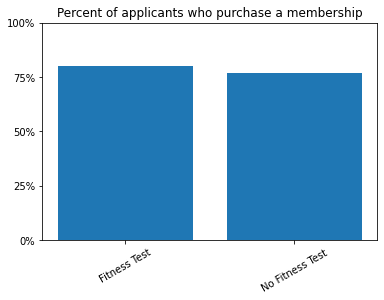

In [19]:
ax = plt.subplot()
plt.bar(([0, 1]), member_pivot['Percent Purchase'])
plt.title("Percent of applicants who purchase a membership")
ax.set_yticks([0, 0.25, 0.50, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Fitness Test", "No Fitness Test"], rotation=30)
plt.show()

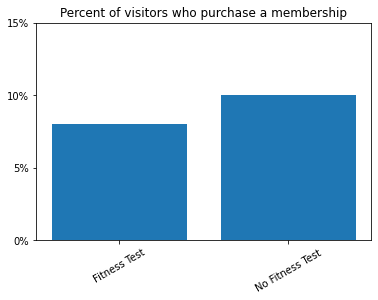

In [20]:
ax = plt.subplot()
plt.bar(([0, 1]), final_member_pivot["Percent Purchase"])
plt.title("Percent of visitors who purchase a membership")
ax.set_yticks([0, 0.05, 0.10, 0.15])
ax.set_yticklabels(['0%', '5%', '10%', '15%'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Fitness Test", "No Fitness Test"], rotation=30)
plt.show()